# Plots the State Transition Graph

Plots STG for a couple of boolean networks

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import cana
from cana.networks.bio import MARQUESPITA as MP #, DROSOPHILA as D, YEAST as Y
from cana.networks.bools import AND
import networkx as nx
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', **{'size':16})

In [14]:
N = MP()
print N

<BNetwork(Name='', N=7, Nodes=['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])>


In [18]:
stg = N.get_state_transition_graph()
attractors = N.get_attractors(mode='stg')
print 'STG: %s' % (attractors)
attractors = N.get_attractors(mode='bns')
print 'BNS: %s' % (attractors)

STG: [[126]]
BNS: [[126]]


Nodes: 128 | Edges: 128


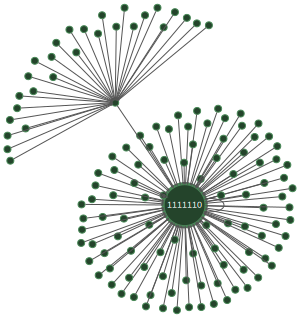

In [19]:
# Draw the State Transition Graph
G = graphviz.Digraph(name='State Transition Graph', engine='neato')
G.attr('graph', concentrate='true', simplify='true', overlap='true')
G.attr('node', shape='circle', fixedsize='true', width='.4', color='#488957', style='filled', fillcolor='#24442b', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='9')
G.attr('edge', arrowhead='normal', arrowsize='.1', color='#545454')

for node,d in stg.nodes(data=True):
    if any(node in attractor for attractor in attractors): #node in attractors:
        label = d['label']
        width = '0.6'
        penwidth = '3'
    else:
        label = ''
        width = '0.1'
        penwidth = '1'
    G.node(name=str(node), label=label, width=width, penwidth=penwidth)
for s,t,d in stg.edges(data=True):
    G.edge(str(s),str(t))
print 'Nodes: %d | Edges: %d' % (len(stg.nodes()) , len(stg.edges()) )
G